In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
data = pd.read_csv('/content/WorldPopulationByAge2020.csv')

In [ ]:
data_cleaned = data.dropna()

data_cleaned['PopMale'] = pd.to_numeric(data_cleaned['PopMale'], errors='coerce')
data_cleaned['PopFemale'] = pd.to_numeric(data_cleaned['PopFemale'], errors='coerce')
data_cleaned['PopTotal'] = pd.to_numeric(data_cleaned['PopTotal'], errors='coerce')

In [ ]:
data_cleaned.rename(columns={
    'Location': 'Country',
    'AgeGrp': 'AgeGroup',
    'PopMale': 'PopulationMale',
    'PopFemale': 'PopulationFemale',
    'PopTotal': 'TotalPopulation'
}, inplace=True)

In [ ]:
print("Cleaned Data Sample:")
print(data_cleaned.head())

Cleaned Data Sample:
       Country AgeGroup  PopulationMale  PopulationFemale  TotalPopulation
0  Afghanistan     0-19         10709.0           10197.0          20906.0
1  Afghanistan    20-39          5994.0            5574.0          11568.0
2  Afghanistan    40-59          2485.0            2316.0           4801.0
3  Afghanistan      60+           781.0             858.0           1639.0
4       Africa     0-19        344109.0          334982.0         679091.0


In [ ]:
random_countries = random.sample(list(data_cleaned['Country'].unique()), 10)
subset_data = data_cleaned[data_cleaned['Country'].isin(random_countries)]
age_distribution = subset_data.groupby(['Country', 'AgeGroup'])['TotalPopulation'].sum().unstack()

***Plotting the bar chart for the population distribution by age group and country***

<Figure size 1200x800 with 0 Axes>

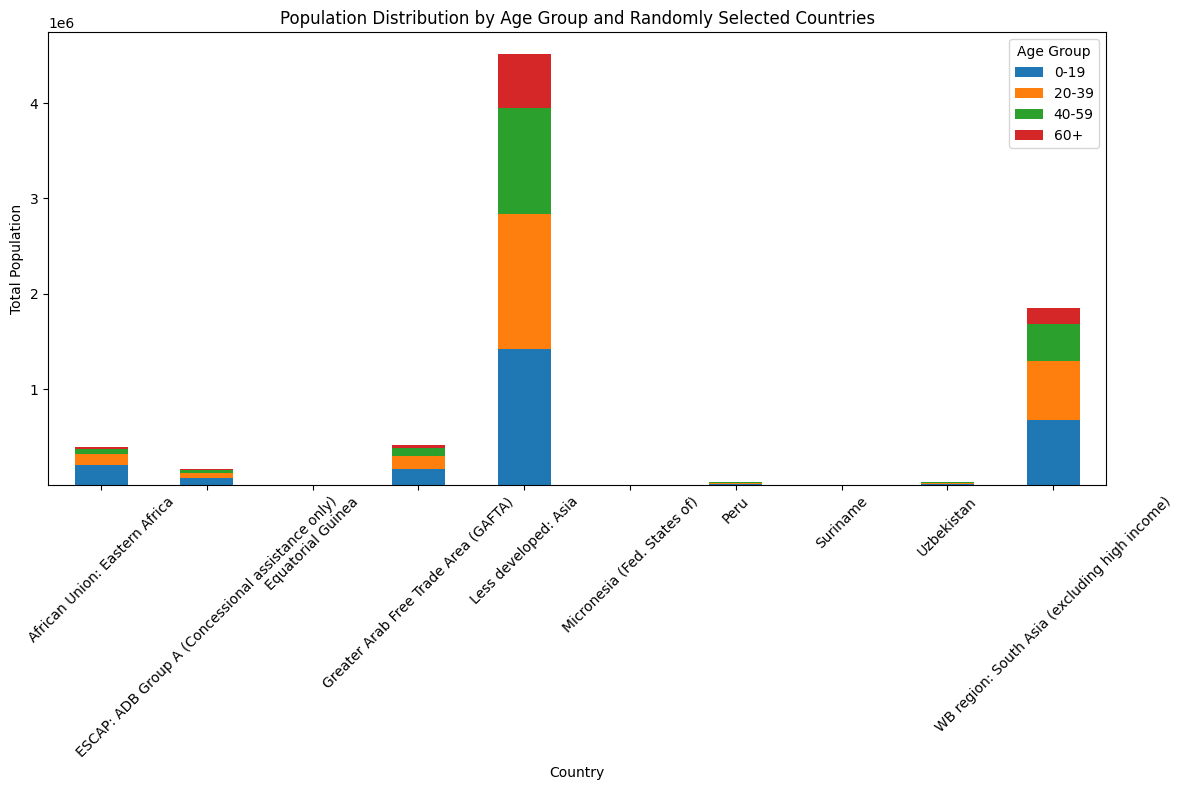

In [ ]:
plt.figure(figsize=(12, 8))
age_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Population Distribution by Age Group and Randomly Selected Countries')
plt.xlabel('Country')
plt.ylabel('Total Population')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

***Apply log transformation (adding 1 to avoid log(0))***

In [ ]:
data_cleaned['LogTotalPopulation'] = np.log1p(data_cleaned['TotalPopulation'])
data_cleaned['LogPopulationMale'] = np.log1p(data_cleaned['PopulationMale'])
data_cleaned['LogPopulationFemale'] = np.log1p(data_cleaned['PopulationFemale'])

***Histogram for total population (log-transformed)***

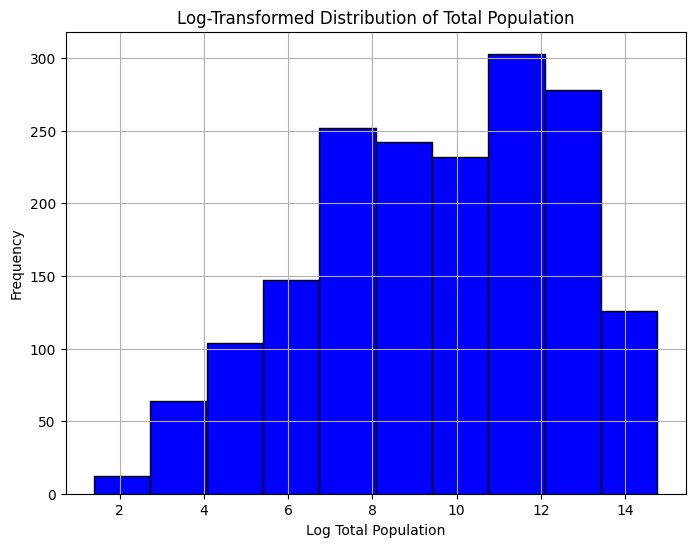

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(data_cleaned['LogTotalPopulation'], bins=10, color='blue', edgecolor='black')
plt.title('Log-Transformed Distribution of Total Population')
plt.xlabel('Log Total Population')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

***Histogram for male and female population distribution (log-transformed)***

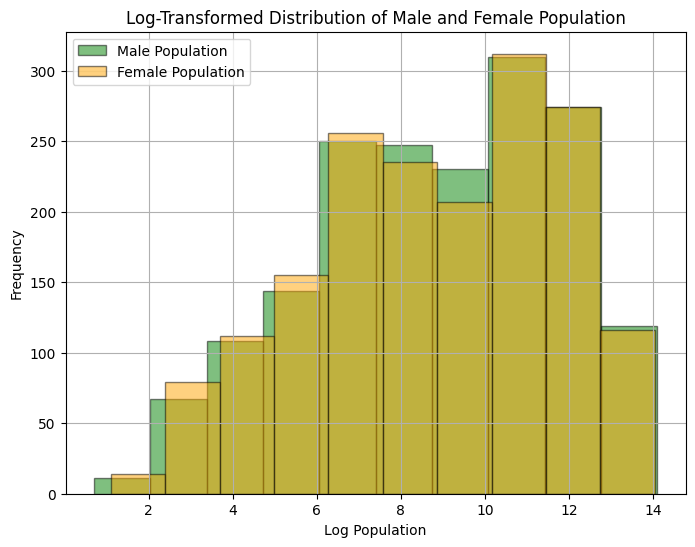

In [ ]:
plt.figure(figsize=(8, 6))

plt.hist(data_cleaned['LogPopulationMale'], bins=10, color='green', alpha=0.5, label='Male Population', edgecolor='black')

plt.hist(data_cleaned['LogPopulationFemale'], bins=10, color='orange', alpha=0.5, label='Female Population', edgecolor='black')

plt.title('Log-Transformed Distribution of Male and Female Population')
plt.xlabel('Log Population')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

***Histogram for age group-wise population (log-transformed)***

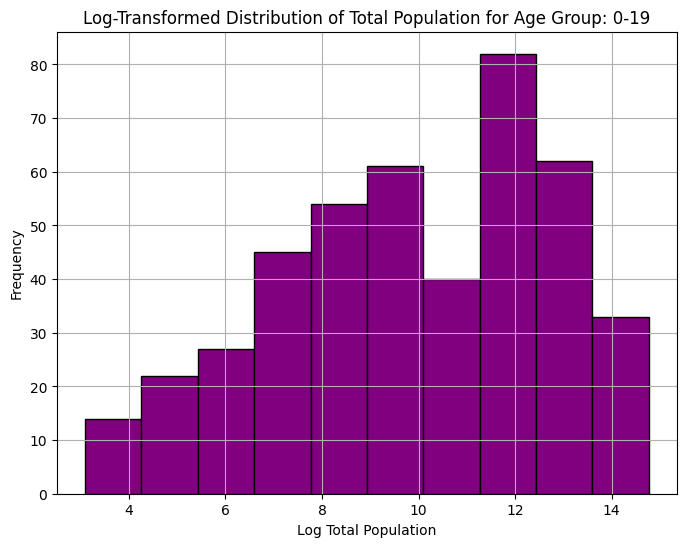

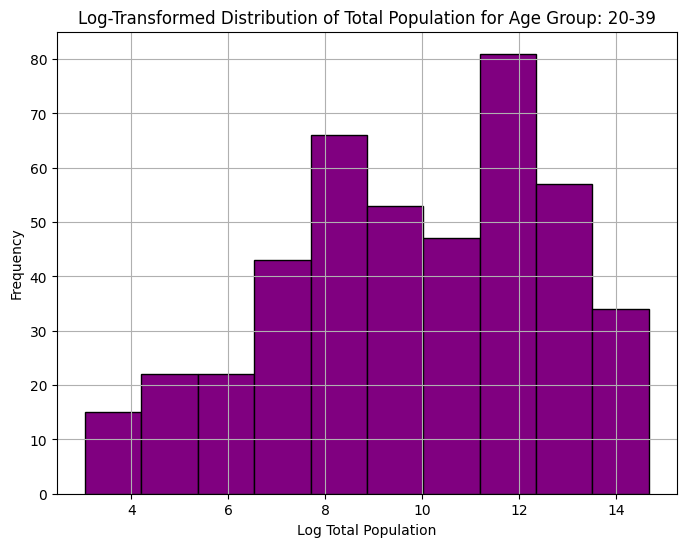

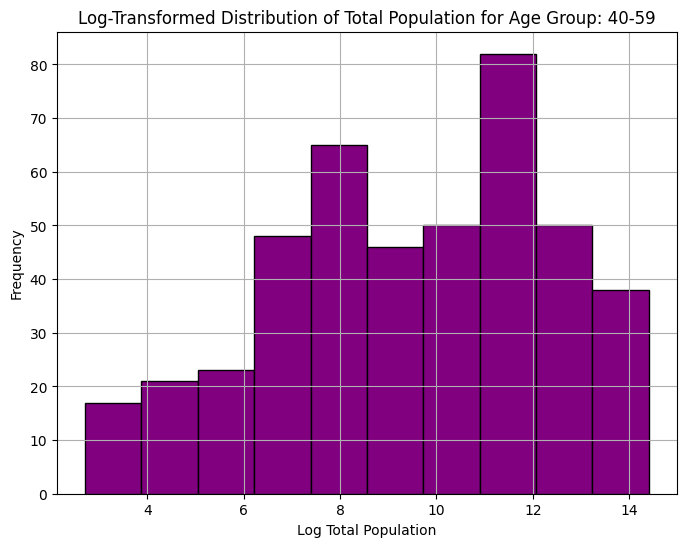

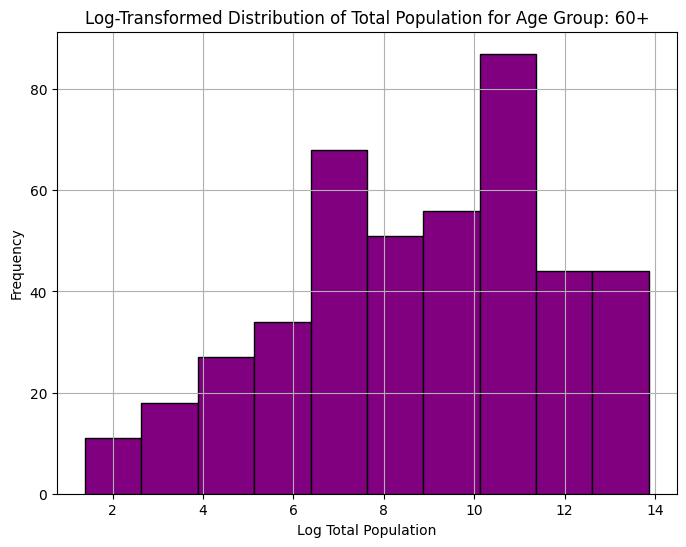

In [ ]:
age_groups = data_cleaned['AgeGroup'].unique()

for age_group in age_groups:
    plt.figure(figsize=(8, 6))
    subset = data_cleaned[data_cleaned['AgeGroup'] == age_group]
    plt.hist(np.log1p(subset['TotalPopulation']), bins=10, color='purple', edgecolor='black')
    plt.title(f'Log-Transformed Distribution of Total Population for Age Group: {age_group}')
    plt.xlabel('Log Total Population')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()